# Guitar Basic Chord Classification Using CNN

**Objective** : This notebook's main focus will be on how to use CNN and Keras to categorize photos of the hand position used to create the guitar's fundamental chord. We want to know the following things in particular.

- **How accurately does CNN classify images?**
- **Which images are best for classification: binary, grayscale, or colored?**
- **What is the best activation function used in the hidden layer?**

### Import Libraries

1. **Library matplotlib, seaborn** required for **image visualization**.
2. **Library tensorflow,keras** required for **modelling and load the images**.
3. **Sklearn** required for **evaluate the models**.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import os

### Load Data

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)

trainPath = '../Data/train/'
valPath = '../Data/val/'
testPath = '../Data/test/'

In [5]:
#Training
train = tf.keras.utils.image_dataset_from_directory(trainPath,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMAGE_SIZE,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

#Validation
validation = tf.keras.utils.image_dataset_from_directory(valPath,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMAGE_SIZE,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

#Test
test = tf.keras.utils.image_dataset_from_directory(testPath,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMAGE_SIZE,
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

Found 1059 files belonging to 7 classes.
Found 140 files belonging to 7 classes.
Found 215 files belonging to 7 classes.


## Visualisasi Data

In [ ]:
# class names
class_names = os.listdir(trainPath)
class_names

['A', 'B', 'C', 'D', 'E', 'F', 'G']

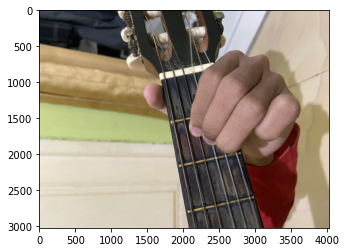

In [ ]:
a = plt.imread('Data/train/A/IMG_0340.jpeg')
plt.imshow(a)

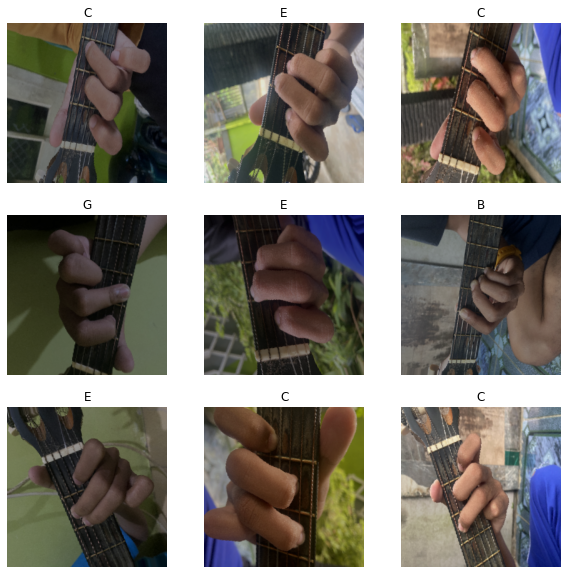

In [ ]:
image, label = train.next()
# data visualization
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i])
    plt.title(class_names[np.argmax(label[i])])
    plt.axis("off")

In [ ]:
labels = []
for x in os.listdir('Data/train/'):
    labels.append(len(os.listdir('Data/train/' + x)))

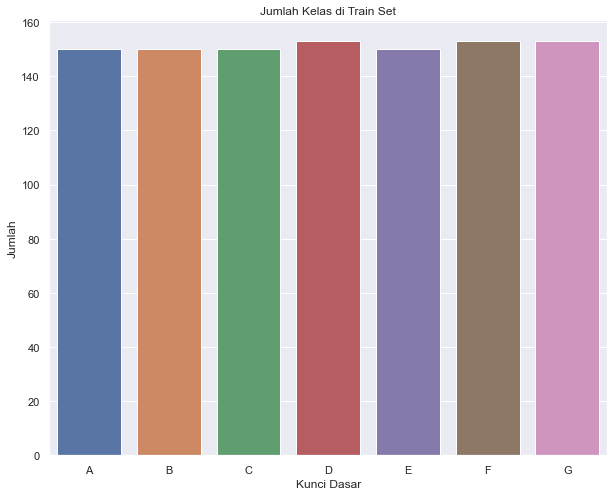

In [ ]:
plt.figure(figsize=(10, 8))

sns.set_theme()


sns.barplot(x=class_names,y=labels)
plt.xlabel('Kunci Dasar')
plt.ylabel('Jumlah')
plt.title('Jumlah Kelas di Train Set')
plt.show()

## Modelling

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(256, 256, 3)),  

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')  
])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)     

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
)

In [ ]:
hasil = model.fit(train, epochs=30,batch_size=32,validation_data=validation,verbose=1,callbacks=[earlyStopping])

Epoch 1/30
34/34 [==============================] - 168s 5s/step - loss: 1.9534 - accuracy: 0.1586 - val_loss: 1.8617 - val_accuracy: 0.2143
Epoch 2/30
34/34 [==============================] - 147s 4s/step - loss: 1.8122 - accuracy: 0.2842 - val_loss: 1.7034 - val_accuracy: 0.2929
Epoch 3/30
34/34 [==============================] - 158s 5s/step - loss: 1.6639 - accuracy: 0.3447 - val_loss: 1.7723 - val_accuracy: 0.3214
Epoch 4/30
34/34 [==============================] - 156s 5s/step - loss: 1.4865 - accuracy: 0.4381 - val_loss: 1.4772 - val_accuracy: 0.4643
Epoch 5/30
34/34 [==============================] - 150s 4s/step - loss: 1.3437 - accuracy: 0.4910 - val_loss: 1.4321 - val_accuracy: 0.4929
Epoch 6/30
34/34 [==============================] - 154s 5s/step - loss: 1.1549 - accuracy: 0.5703 - val_loss: 1.1708 - val_accuracy: 0.5000
Epoch 7/30
34/34 [==============================] - 158s 5s/step - loss: 1.0532 - accuracy: 0.5996 - val_loss: 1.3291 - val_accuracy: 0.5643
Epoch 8/30
34

## Evaluate

#### Evaluasi Test Set

In [ ]:
test_evaluate = model.evaluate(test,verbose =0)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}')

Test loss     : 0.20843549072742462
Test accuracy : 0.93


#### Bandingkan perkembangan epoch

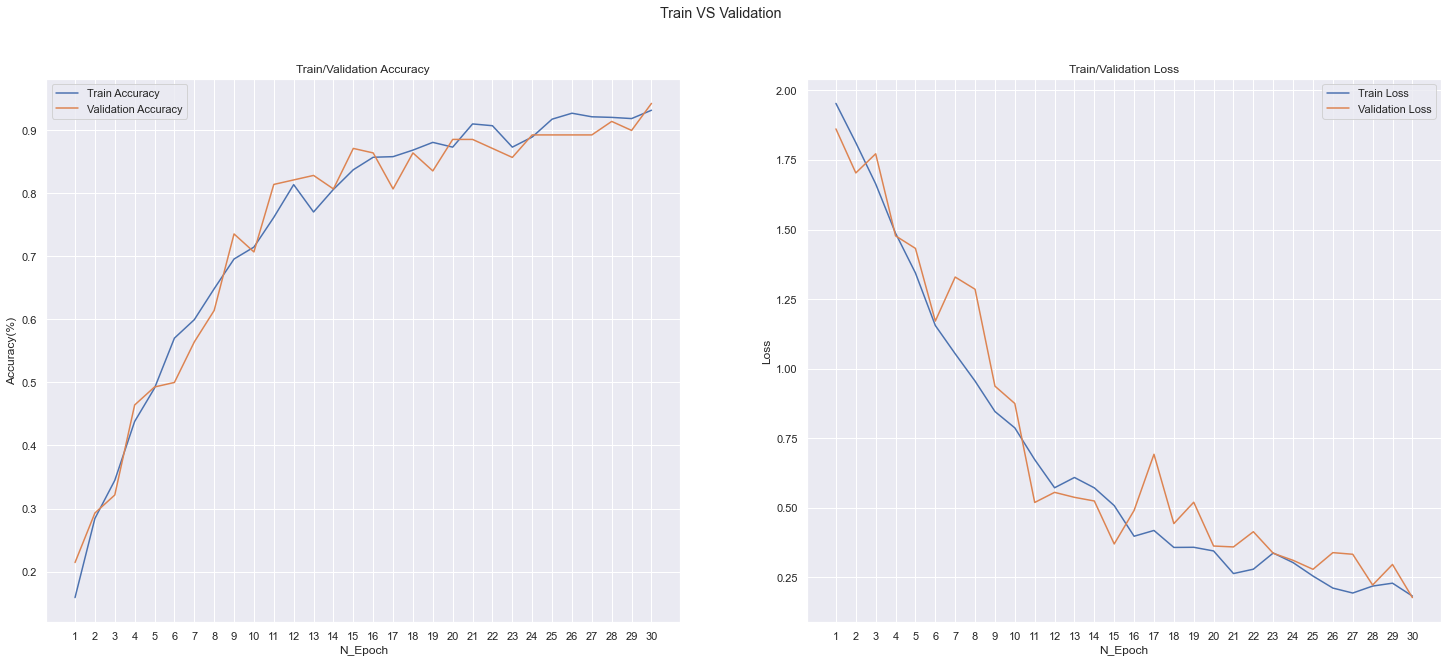

In [ ]:
epoch = [i+1 for i in range(30)]


plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()


#### Preview hasil prediksi

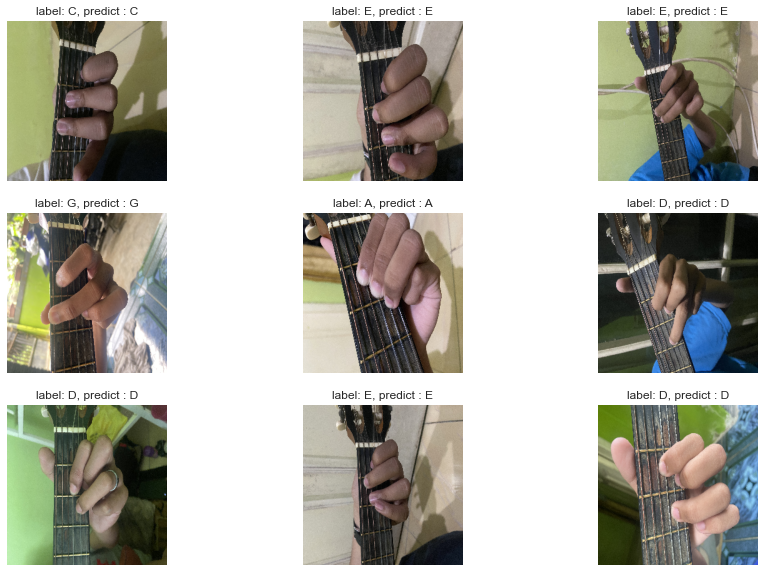

In [ ]:
image ,label = next(iter(test))

plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, predict : {class_names[y_pred]}')

#### Preview prediction error

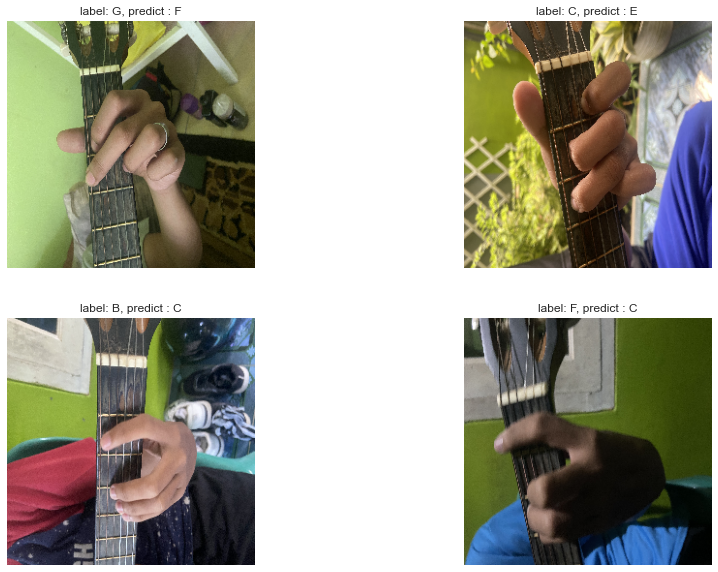

In [ ]:
#Plot prediction Error
image ,label = next(iter(test))
plt.figure(figsize=(15,10))
i,j = 0,0
while (j < 4):
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(2,2,j+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    if (TrueLabel != class_names[y_pred]):
        plt.imshow(tf.squeeze(image[i]))
        plt.title(f'label: {TrueLabel}, predict : {class_names[y_pred]}')
        j+=1
    i+=1

#### Confusion Matrix

In [ ]:
y_test = []
y_pred = []

for i in range(len(test)) :
    x,y = test.next()
    for j in range(len(y)) :
        y_test.append(class_names[tf.argmax(y[j])])
        y_pred.append(class_names[np.argmax(model.predict(x[j][None,...],verbose=0))])

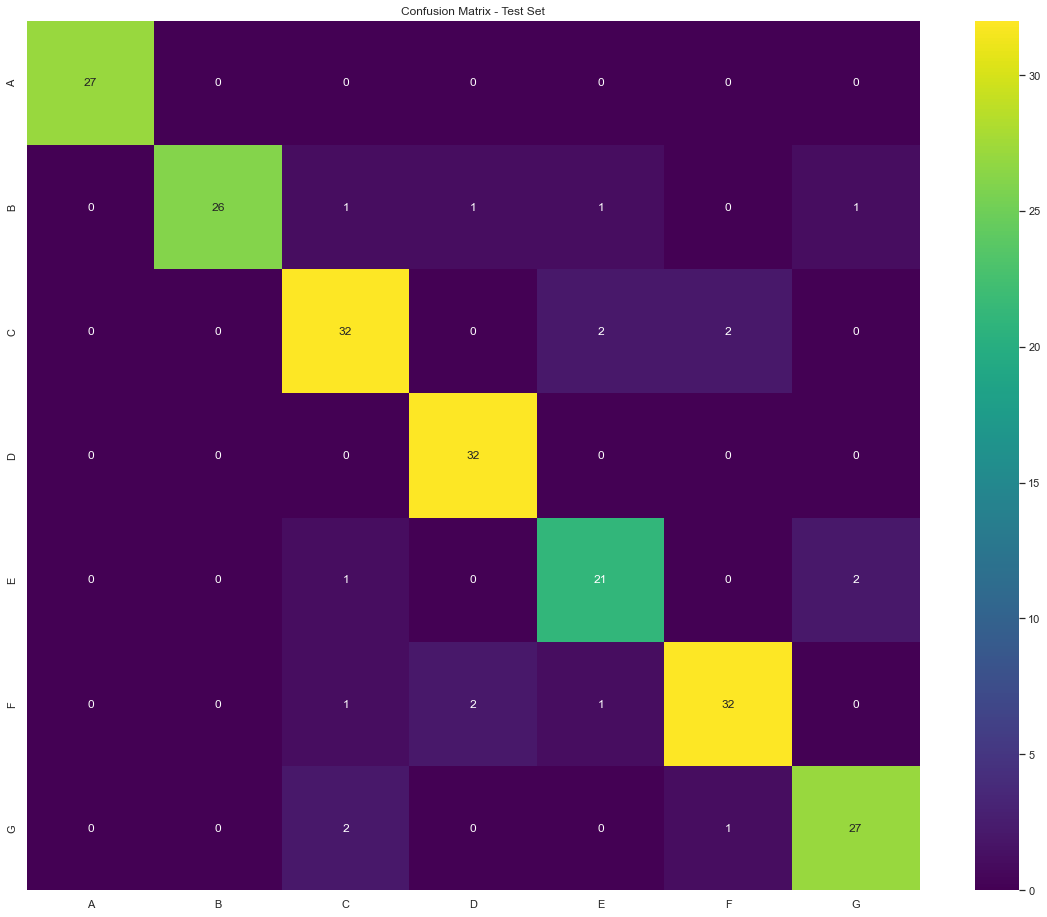

In [ ]:
plt.figure(figsize=(20, 16))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names,cmap='viridis')
plt.title("Confusion Matrix - Test Set")
plt.show()

### Classification Report

In [ ]:

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        27
           B       1.00      0.87      0.93        30
           C       0.86      0.89      0.88        36
           D       0.91      1.00      0.96        32
           E       0.84      0.88      0.86        24
           F       0.91      0.89      0.90        36
           G       0.90      0.90      0.90        30

    accuracy                           0.92       215
   macro avg       0.92      0.92      0.92       215
weighted avg       0.92      0.92      0.92       215

